In [2]:
import pandas as pd
data=pd.read_csv('the_office_series.csv')
print(data)

     Unnamed: 0  Season      EpisodeTitle  \
0             0       1             Pilot   
1             1       1     Diversity Day   
2             2       1       Health Care   
3             3       1      The Alliance   
4             4       1        Basketball   
..          ...     ...               ...   
183         183       9     Stairmageddon   
184         184       9    Paper Airplane   
185         185       9  Livin' the Dream   
186         186       9          A.A.R.M.   
187         187       9            Finale   

                                                 About  Ratings  Votes  \
0    The premiere episode introduces the boss and s...      7.5   4936   
1    Michael's off color remark puts a sensitivity ...      8.3   4801   
2    Michael leaves Dwight in charge of picking the...      7.8   4024   
3    Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4    Michael and his staff challenge the warehouse ...      8.4   4294   
..             

cleaning and sorting data

In [20]:
#data_clean=data.iloc[:,[0]]
data_clean = data[['Unnamed: 0','Ratings','Viewership','GuestStars']]
print(data_clean)

     Unnamed: 0  Ratings  Viewership  \
0             0      7.5       11.20   
1             1      8.3        6.00   
2             2      7.8        5.80   
3             3      8.1        5.40   
4             4      8.4        5.00   
..          ...      ...         ...   
183         183      8.0        3.83   
184         184      8.0        3.25   
185         185      9.0        3.51   
186         186      9.5        4.56   
187         187      9.8        5.69   

                                            GuestStars  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
183                                                NaN  
184                                                NaN  
185   

plot x as episode number and y as view in millions

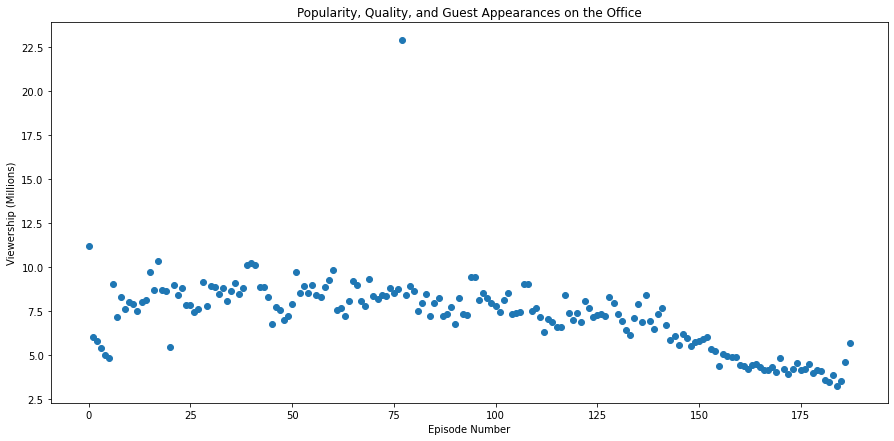

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.rcParams['figure.figsize'] = [15, 7]
plt.scatter(data_clean.iloc[:,0],data_clean.iloc[:,2])
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

color plot depend on rating range

In [121]:
rating_color=[]
for lab, row in data_clean.iterrows() :
    if row['Ratings'] < 2.5:
        rating_color.append('red')
    elif row['Ratings'] < 5:
        rating_color.append('orange')
    elif row['Ratings'] < 7.5:
        rating_color.append('lightgreen')
    else :
        rating_color.append('darkgreen')
print(data_clean['Ratings'],rating_color[100:105])

0      7.5
1      8.3
2      7.8
3      8.1
4      8.4
      ... 
183    8.0
184    8.0
185    9.0
186    9.5
187    9.8
Name: Ratings, Length: 188, dtype: float64 ['darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'lightgreen']


In [122]:
print(data_clean.loc[data_clean['Ratings']<7.5])
print(data_clean['GuestStars'].isnull().values)

     Unnamed: 0  Ratings  Viewership       GuestStars
104         104      6.8        7.29              NaN
123         123      7.4        7.65              NaN
143         143      7.3        5.82              NaN
148         148      6.9        5.50              NaN
153         153      7.4        5.31              NaN
159         159      6.6        4.87              NaN
160         160      7.1        4.39              NaN
161         161      7.0        4.35              NaN
162         162      7.0        4.17              NaN
166         166      7.1        4.13              NaN
167         167      7.4        4.14              NaN
169         169      7.0        4.00  Stephen Colbert
179         179      7.3        4.15              NaN
[ True  True  True  True  True False  True  True False False  True  True
 False  True False  True False  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True 

size plot depend on guest appearance

In [123]:
marker=[]
for lab, row in data_clean.iterrows():
    if pd.isna(row['GuestStars']):
        marker.append(25)
    else:
        marker.append(250)
print(marker)

[25, 25, 25, 25, 25, 250, 25, 25, 250, 250, 25, 25, 250, 25, 250, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 250, 250, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 250, 25, 250]


use color and marker to plot graph

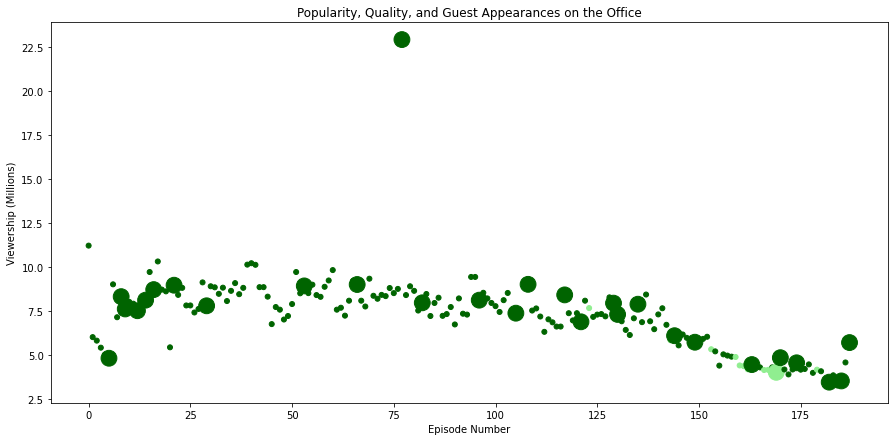

In [136]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [15, 7]
plt.scatter(data_clean.iloc[:,0],data_clean.iloc[:,2],c=rating_color,s=marker)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

Name one star guest in most watch episode

In [137]:
most_watch_ep = data_clean['Viewership'].idxmax()
print(most_watch_ep)
all_top_star=data_clean.iloc[most_watch_ep,3]
print(all_top_star)
star_split=all_top_star.split(",")
top_star=star_split[0]
print(top_star)

77
Cloris Leachman, Jack Black, Jessica Alba
Cloris Leachman
